## Unsupervised Learning Models

### K-Means Clustering
K-Means clustering is a centroid-based algorithm method that does not train models before its deployment. It is meant to assign data into different clusters based on their similarity. Similarity of the data is obtained by calculating their Euclidean distance from the term called centroid that stays at the center of any given cluster. Unlike KNN (where K refers to the number of neighboring data points that will be incorporated for classification purposes), K in K-means refers to the number of clusters that should be generated, and the lower the number of clusters or k-value, the higher is the chance for the model to be undefitted. In contrast, the lower the k-value in KNN, the higher the chance for the model to be overfitted. The cluster dynamics in K-Means clustering is convex as it only seems to bulge outwards. And, each cluster in the model is supposed to have most equal number of data, such that the size of the clusters is usually similar.     

Most importantly, K-Means, like every other unsupervised learning model, do not have a TARGET VARIABLE that they are supposed to predict or classify themselves into!!!. Since they have to cluster data based on feature similarity without referencing to pre-trained models, they function poorly with increasing dimensions in comparison to supervised learning models. Also, compared to DBSCAN and HDBSCAN, K-means algorithm is easily infected by outliers, and cannot identify them seperately from the clusters.  

In [5]:
# We shall work with a randomly generated synthesized dataset with very high covariance
import numpy as np

num_samples = 1000
mean = [0, 0] # Center the data around (0,0)
covariance_matrix_high_scatter = [[50, 0], [0, 50]] #50 that runs diagonally in the covar matrix determines the feature variance, whereas as 0 that runs off-diagonally deter
# mine the covariance between the variables, which is essentially zero to generate a random state

np.random.seed(42) # for reproducibility. Its more like setting random_state any value
scattered_data = np.random.multivariate_normal(mean=mean, cov=covariance_matrix_high_scatter, size=num_samples)
scattered_data[0:9]

array([[  3.51229946,  -0.97767625],
       [  4.57984957,  10.76944739],
       [ -1.65571439,  -1.6555983 ],
       [ 11.16672091,   5.42658301],
       [ -3.31968522,   3.83647886],
       [ -3.27685793,  -3.29320667],
       [  1.71093163, -13.52893435],
       [-12.19701096,  -3.97597325],
       [ -7.16179753,   2.2220642 ]])

In [13]:
import pandas as pd
rand_data = pd.DataFrame(scattered_data)
rand_data.columns = ["Feature A", "Feature B"]
rand_data.head()

,Feature A,Feature B
0,3.512299,-0.977676
1,4.579850,10.769447
2,-1.655714,-1.655598
3,11.166721,5.426583
4,-3.319685,3.836479


<Axes: xlabel='Feature A', ylabel='Feature B'>

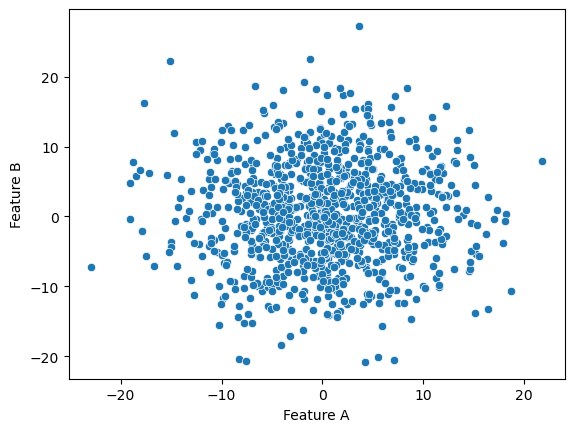

In [15]:
#Lets check the covariance of the data through a scatterplot to see if it has high scatter
import seaborn as sns
sns.scatterplot(x = rand_data["Feature A"], y = rand_data["Feature B"])

In [17]:
rand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature A  1000 non-null   float64
 1   Feature B  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [19]:
#Now, standardizing the data. Standardizing the data is important in K-Means because distances need to be calculated. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
rand_data_scaled = scaler.fit_transform(rand_data) #note that there is no training data in unsupervised learning models, and therefore everything gets transformed
rand_data_df = pd.DataFrame(rand_data_scaled) 
rand_data_df.columns = ["Feature A", "Feature B"]
rand_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature A  1000 non-null   float64
 1   Feature B  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [20]:
#Now initiailizing the k-means
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_init=12, n_clusters = 3) 
#kmeans++ is the most robust k-means technique to perform the clustering function, and as we have stated, we are performing 12 rounds of reiteration of the clustering process 
#until the centroid is placed most accurately. four clusters shall be created.
k_means.fit(rand_data_df)

KMeans(n_clusters=3, n_init=12)

In [22]:
#Now assigning datapoints into clusters based on the fitted model
k_means_assign = k_means.labels_
rand_data_df["label_assign"] = k_means_assign 
rand_data_df.head()
#label assign appear to be some sort of classification feature of object type. Other forms of supervision learning algorithms can be pursued onto it

,Feature A,Feature B,label_assign
0,0.482278,-0.192465,1
1,0.639359,1.445163,2
2,-0.278153,-0.286972,0
3,1.608564,0.700332,1
4,-0.522993,0.478660,2


In [23]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-0.54751005, -0.85966816],
       [ 1.08042767, -0.10173135],
       [-0.4293971 ,  0.92815365]])

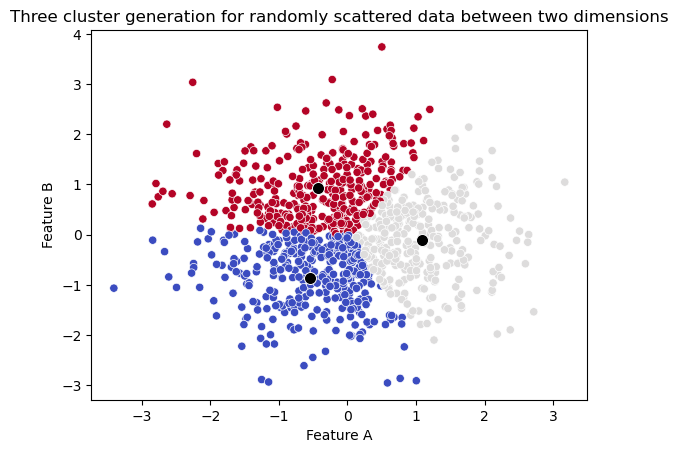

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns  

sns.scatterplot(x = rand_data_df["Feature A"], y = rand_data_df["Feature B"], c=k_means_assign, cmap="coolwarm")
sns.scatterplot(x = k_means_cluster_centers[:, 0], y = k_means_cluster_centers[:, 1], color = "black", s = 75)
plt.xlabel("Feature A")
plt.ylabel("Feature B")
plt.title("Three cluster generation for randomly scattered data between two dimensions")
plt.show()
#This diagram clearly shows three clusters that has generated based on the nearest euclidean distance from their respective cluster centers or centroids. 
#Note that no outliers were not identified, and all values were forced in the clusters. 

#### Note:
Refer to "STATISTICS AND CLUSTERING IN PYTHON" notebook for comprehensive insights on k-means clustering

## <font color = "red"> Warning!!! </font>
#### <font color = "red"> We have not worked out the k-mean cluster evaluation techniques (i.e., Silhoutte score, David Bouldin Index, and Intertia) due to limited knowledge regarding visualizations </font>

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
DBSCAN is a density-based clustering algorithm that aims to group together data points that are closely packed together (i.e., have many neighbors within a certain radius), marking as outliers points that lie alone in low-density regions. It identifies "core points" (points with enough neighbors in a given radius), "border points" (points within a core point's radius but not core themselves), and "noise points" (outliers). So, in a way, DBSCAN is good at identifying outliers in a dataset. 

DBSCAN is especially useful for spatial data. Its design principles make it very well-suited for discovering patterns and groupings in geographical or other spatial datasets, such as identifying wildlife complexes by processing coordinates of wildlife sightings or springsheds by identifying the density of spring source points.  

In [32]:
import pandas as pd
File = pd.read_csv("Museum_Canada.csv")
Museum_Cananda  = pd.DataFrame(File)
Museum_Cananda.drop(columns = "Unnamed: 0", axis=1, inplace = True)
Museum_Cananda.head()

,Index,Facility_Name,Source_Facility_Type,ODCAF_Facility_Type,Provider,Unit,Street_No,Street_Name,Postal_Code,City,Prov_Terr,Source_Format_Address,CSD_Name,CSDUID,PRUID,Latitude,Longitude
0,1,#Hashtag Gallery,..,gallery,toronto,..,801,dundas st w,M6J 1V2,toronto,on,801 dundas st w,Toronto,3520005,35,43.65169472,-79.40803272
1,2,'Ksan Historical Village & Museum,historic site-building or park,museum,canadian museums association,..,1500,62 hwy,V0J 1Y0,hazelton,bc,1500 hwy 62 hazelton british columbia v0j 1y0 ...,Hazelton,5949022,59,55.2645508,-127.6428124
2,3,'School Days' Museum,community/regional museum,museum,canadian museums association,..,427,queen st,E3B 5R6,fredericton,nb,427 queen st fredericton new brunswick e3b 5r6...,Fredericton,1310032,13,45.963283,-66.6419017
3,4,10 Austin Street,built heritage properties,heritage or historic site,moncton,..,10,austin st,E1C 1Z6,moncton,nb,10 austin st,Moncton,1307022,13,46.09247776,-64.78022946
4,5,10 Gates Dancing Inc.,arts,miscellaneous,ottawa,..,..,..,..,ottawa,on,..,Ottawa,3506008,35,45.40856224,-75.71536766


In [34]:
Museum_Cananda.info()
#None missing data found. most of the features are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7972 entries, 0 to 7971
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Index                  7972 non-null   int64 
 1   Facility_Name          7972 non-null   object
 2   Source_Facility_Type   7972 non-null   object
 3   ODCAF_Facility_Type    7972 non-null   object
 4   Provider               7972 non-null   object
 5   Unit                   7972 non-null   object
 6   Street_No              7972 non-null   object
 7   Street_Name            7972 non-null   object
 8   Postal_Code            7972 non-null   object
 9   City                   7972 non-null   object
 10  Prov_Terr              7972 non-null   object
 11  Source_Format_Address  7972 non-null   object
 12  CSD_Name               7972 non-null   object
 13  CSDUID                 7972 non-null   object
 14  PRUID                  7972 non-null   object
 15  Latitude             

In [36]:
print(Museum_Cananda["ODCAF_Facility_Type"].unique())

['gallery' 'museum' 'heritage or historic site' 'miscellaneous'
 'library or archives' 'artist' 'theatre/performance and concert hall'
 'art or cultural centre' 'festival site']


In [38]:
# We are specifically interested in museum facilities only, and it seems the filtering has reduced the number of records to 1938 from 7972
Museum_Facility = Museum_Cananda[Museum_Cananda["ODCAF_Facility_Type"] == "museum"]
Museum_Facility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 7969
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Index                  1938 non-null   int64 
 1   Facility_Name          1938 non-null   object
 2   Source_Facility_Type   1938 non-null   object
 3   ODCAF_Facility_Type    1938 non-null   object
 4   Provider               1938 non-null   object
 5   Unit                   1938 non-null   object
 6   Street_No              1938 non-null   object
 7   Street_Name            1938 non-null   object
 8   Postal_Code            1938 non-null   object
 9   City                   1938 non-null   object
 10  Prov_Terr              1938 non-null   object
 11  Source_Format_Address  1938 non-null   object
 12  CSD_Name               1938 non-null   object
 13  CSDUID                 1938 non-null   object
 14  PRUID                  1938 non-null   object
 15  Latitude               193

In [40]:
#we are only with coordinates features
Museum_Facility_latlong = Museum_Facility[["Latitude", "Longitude"]]
Museum_Facility_latlong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 7969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   1938 non-null   object
 1   Longitude  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [42]:
#converting the coordinates into floats
print(Museum_Facility_latlong["Latitude"].value_counts()) 
print(Museum_Facility_latlong["Longitude"].value_counts())
# Looks like we have to deal with the randomly assigned value ".." first, and we have been advised to drop it

Latitude
..             331
51.01423945      6
45.71061766      3
48.369878        3
60.72105795      2
              ... 
43.03389196      1
42.83279348      1
50.511706        1
43.89208166      1
42.31850631      1
Name: count, Length: 1584, dtype: int64
Longitude
..              331
-114.1162943      6
-63.2859451       3
-53.359843        3
-135.0516172      2
               ... 
-79.01975466      1
-79.93681622      1
-116.0288768      1
-79.26752268      1
-83.04242908      1
Name: count, Length: 1584, dtype: int64


In [44]:
import numpy as np
Museum_Facility_lat = Museum_Facility_latlong["Latitude"].replace("..", np.nan)
Museum_Facility_lat.dropna(inplace = True)
Museum_Facility_lat = Museum_Facility_lat.astype("float64")

Museum_Facility_long = Museum_Facility_latlong["Longitude"].replace("..", np.nan)
Museum_Facility_long.dropna(inplace = True)
Museum_Facility_long = Museum_Facility_long.astype("float64")

Museum_coord = pd.concat([Museum_Facility_lat, Museum_Facility_long], axis=1)
Museum_coord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 1 to 7969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   1607 non-null   float64
 1   Longitude  1607 non-null   float64
dtypes: float64(2)
memory usage: 37.7 KB


In [46]:
#Activating DBSCAN
minsample = 3 #defines the minimum number of samples necessary to form a neighborhood
epsilon = 1 #epsilon defines the radius of the neighborhood search
distance = "euclidean" #method of distance measurement

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = epsilon, min_samples = minsample, metric = distance)
dbscan.fit(Museum_coord)

DBSCAN(eps=1, min_samples=3)

In [48]:
Museum_coord.head(3)

,Latitude,Longitude
1,55.264551,-127.642812
2,45.963283,-66.641902
8,49.176354,-123.112783


In [50]:
#Now assigning cluster labels into the modified dataframe
Museum_coord["cluster"] = dbscan.fit_predict(Museum_coord)

In [52]:
Museum_coord["cluster"].value_counts()

cluster
 1     968
 2     491
-1      45
 3      40
 13      8
 14      7
 11      6
 12      6
 6       6
 5       5
 8       4
 0       3
 7       3
 4       3
 9       3
 10      3
 15      3
 16      3
Name: count, dtype: int64

#### WARNING 
The following block of code relating to geodata may be covered more in the Data Visualization course. Please do not worry about it here

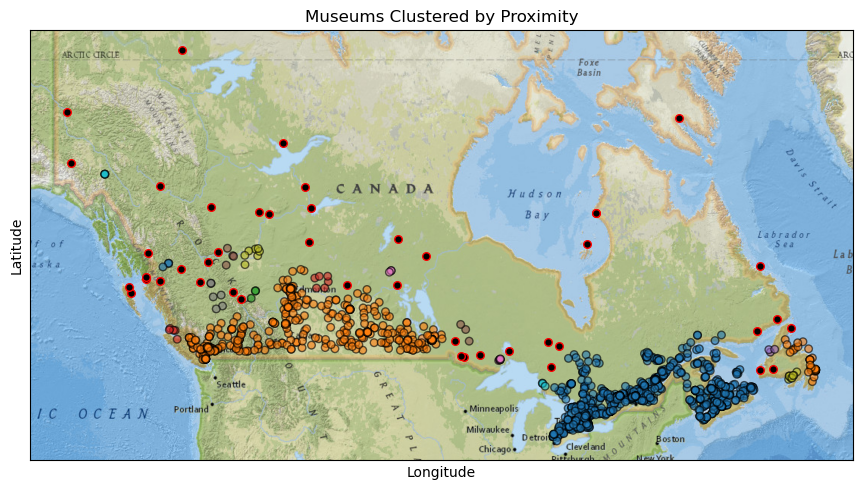

In [55]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

def plot_clustered_locations(df,  title='Museums Clustered by Proximity'):
    # Load the coordinates into a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326") 
    
    # Reproject to Web Mercator to align with basemap 
    gdf = gdf.to_crs(epsg=3857)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_aspect('equal') 
    
    # Separate non-noise, or clustered points from noise, or unclustered points
    non_noise = gdf[gdf['cluster'] != -1]
    noise = gdf[gdf['cluster'] == -1]
    
    # Plot noise points 
    noise.plot(ax=ax, color='k', markersize=30, ec='r', alpha=1, label='Noise')
    
    # Plot clustered points, colured by 'Cluster' number
    non_noise.plot(ax=ax, column='cluster', cmap='tab10', markersize=30, ec='k', legend=False, alpha=0.6)
    
    # Add basemap of  Canada
    ctx.add_basemap(ax, source='./Canada.tif', zoom=4)
    
    # Format plot
    plt.title(title, )
    plt.xlabel('Longitude', )
    plt.ylabel('Latitude', )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    
    # Show the plot
    plt.show()
plot_clustered_locations(Museum_coord,  title='Museums Clustered by Proximity')
#Major clustering is observed in southeastern and southwestern Canada noises scattered across the map. Let's see if Hierarchical DBSCAN can find hierarchy within the major
#clusters

### Hierarchical Density-based Spatial Clustering and Noise Filtering (HDBSCAN)
HDBSCAN is a density-based clustering algorithm that constructs a density-based hierarchy of all possible clusters. Unlike DBSCAN, it eliminates the need to set the epsilon parameter (i.e., the range of the neighborhood) completely, as it employs a sophisticated algorithm to extract the "most stable" clusters from the hierarchy. Stability is determined by how long a cluster persists across varying density thresholds (unlike DBSCAN, which uses a single density threshold moderated by epsilon). This means it automatically provides a robust clustering result without needing to explicitly choose where to "cut" the hierarchy.

HDBSCAN is more like DBSCAN on autopilot which adjusts density by itself. However, minimum cluster size is still an adjustment to be dealt with that requires visual inspection and domain expertise

In [57]:
import hdbscan
clustersize = 2 #clustersize that is used to determine the minimum_cluster_size of an allowable cluster
                  #Since accuracy of the output cannot be measured for unspervised models we can say which min cluster size is appropriate without expert knowledge or 
                  #trial and error
HDB = hdbscan.HDBSCAN(min_cluster_size = clustersize, metric = "euclidean")
HDB.fit(Museum_coord)

D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(min_cluster_size=2)

In [58]:
Museum_coord["cluster_HDB"] = HDB.fit_predict(Museum_coord)
Museum_coord["cluster_HDB"].value_counts()

D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


cluster_HDB
-1      351
 170     39
 120     24
 163     22
 21      17
       ... 
 55       2
 205      2
 70       2
 32       2
 86       2
Name: count, Length: 248, dtype: int64

In [59]:
Museum_coord.head()

,Latitude,Longitude,cluster,cluster_HDB
1,55.264551,-127.642812,0,24
2,45.963283,-66.641902,1,53
8,49.176354,-123.112783,2,-1
13,49.261938,-123.151123,2,-1
15,49.889559,-97.235744,2,122


In [60]:
Museum_coord["cluster_HDB"].value_counts()
# As we can see, we have 219 data points that have been classified as outliers. We can specifically drop these data if we want to perform robust regression in datasets that 
#are conducive to such a statistical process. Of course, not between two dimensions of geographical coordinates. 

cluster_HDB
-1      351
 170     39
 120     24
 163     22
 21      17
       ... 
 55       2
 205      2
 70       2
 32       2
 86       2
Name: count, Length: 248, dtype: int64

#### WARNING 
The following block of code relating to geodata may be covered more in the Data Visualization course. Please do not worry about it here

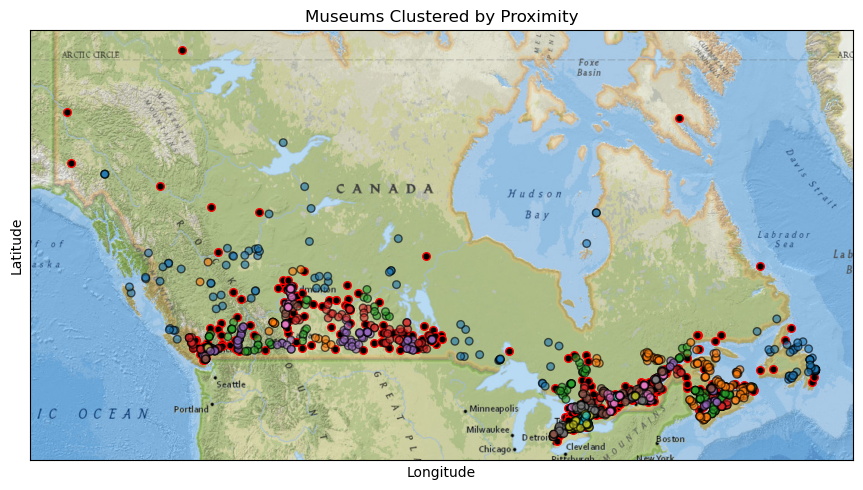

In [62]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

def plot_clustered_locations(df,  title='Museums Clustered by Proximity'):
    # Load the coordinates into a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326") 
    
    # Reproject to Web Mercator to align with basemap 
    gdf = gdf.to_crs(epsg=3857)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_aspect('equal') 
    
    # Separate non-noise, or clustered points from noise, or unclustered points
    non_noise = gdf[gdf['cluster_HDB'] != -1]
    noise = gdf[gdf['cluster_HDB'] == -1]
    
    # Plot noise points 
    noise.plot(ax=ax, color='k', markersize=30, ec='r', alpha=1, label='Noise')
    
    # Plot clustered points, colured by 'Cluster' number
    non_noise.plot(ax=ax, column='cluster_HDB', cmap='tab10', markersize=30, ec='k', legend=False, alpha=0.6)
    
    # Add basemap of  Canada
    ctx.add_basemap(ax, source='./Canada.tif', zoom=4)
    
    # Format plot
    plt.title(title, )
    plt.xlabel('Longitude', )
    plt.ylabel('Latitude', )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()
plot_clustered_locations(Museum_coord,  title='Museums Clustered by Proximity')
# The smaller the cluster size administered, the greater the diversity of the cluster, and the less the noise 

## Dimension Reduction and Feature Engineering
As discussed in earlier works, high dimensions or a large number of features affect the performance of clustering algorithms and other techniques for statistical inference gains. Therefore, dimension reduction techniques must be deployed to consolidate features of similar direction or correlation into lower dimensions. For visual reference and assessment, it is best to produce two-dimension data from multiple dimensions.

It is important to note that it is essential for the dimension reduction technique to preserve the clustering dynamics of the original dataset although the number of dimensions in the dataset has been signficantly reduced

### Principal Component Analysis (PCA)
PCA is the simplest linear dimension reduction tool that generates orthogonal (uncorrelated) principal components that capture the maximum variance in the data. In other words, PCA is a tool to reduce the complexity of the data due to higher dimensions without compromising the essence, insights, and signficance of the data. PCA, as a dimension reduction tool, eliminates the "curse of dimensionality" that affects the performance of cluster algorithms. PCA can often precede other dimensionality reduction techniques, such as t-SNE or UMAP, that are performed on non-linear dimensions. 

In [70]:
#In here, we shall conduct PCA with a synthesized dataset with a strong covariance or correlation. 
import pandas as pd
File =pd.read_csv("Synth_PCA.csv")
Synth_PCA = pd.DataFrame(File)
Synth_PCA.drop(columns = "Unnamed: 0", axis=1, inplace=True)

In [72]:
Synth_PCA.columns = ["Column A", "Column B"]
Synth_PCA.head()

,Column A,Column B
0,-0.779843,-0.725035
1,-1.710971,-0.056423
2,0.489592,0.185568
3,-2.971226,-1.675159
4,0.569237,0.900239


<Axes: xlabel='Column A', ylabel='Column B'>

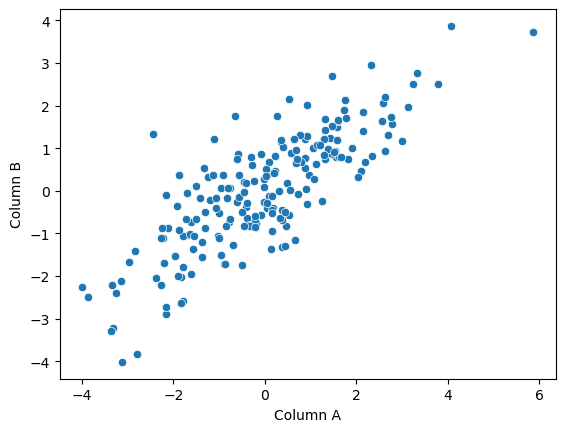

In [73]:
# Visualizing the correlation or covariance between the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = Synth_PCA["Column A"], y = Synth_PCA["Column B"])
# The covariance and correlation between the two data features must be strong. If existied in a larger dataset, they would be especially brought under a single component
#through PCA 

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
PCA_synth = pca.fit_transform(Synth_PCA) #note that in here, both fitting and transforming have been consolidated. They may also be done seperately in the fitted model is also
                                         #to be applied elsewhere such as testing data for regression or classification purpose
PCA_synth[0:7] #these are the transformed two principal components built from the two feature sets

array([[-1.04842083, -0.10698096],
       [-1.36011135,  0.99614702],
       [ 0.51185649, -0.18570359],
       [-3.3544324 ,  0.51527917],
       [ 1.01944843,  0.32365654],
       [ 0.99999361, -0.34382787],
       [-0.5158304 , -1.28757105]])

In [79]:
components = pca.components_
components #so the first row is the respective weights of the two features that were applied in building the first principal component
           #the second row is the respective weights of the two features that were applied in building the second principal component

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [81]:
pca.explained_variance_ratio_
# It means that the first component explains 91.11 percent of the variance in the dataset and the second component explains 8.88 percent of the variance in the dataset
print(f"In total the components explain {round((pca.explained_variance_ratio_.sum()),2)*100} percent of the variance in the dataframe combinedly")

In total the components explain 100.0 percent of the variance in the dataframe combinedly


In [87]:
#Just checking the contribution of each PCA in determining the variance in the dataset
print(pca.explained_variance_ratio_)

[0.9111946 0.0888054]


Additional linear algebra to graph the variance that has been explained by the two components of the PCA (Optional task)

In [90]:
projection_pc1 = np.dot(Synth_PCA, components[0])
projection_pc2 = np.dot(Synth_PCA, components[1])
#These functions produce lines that calculate the projection of the original data onto the principal components that were created earlier

In [92]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]
#These lines of code are attempting to reconstruct or visualize aspects of the original data using the principal component projections.

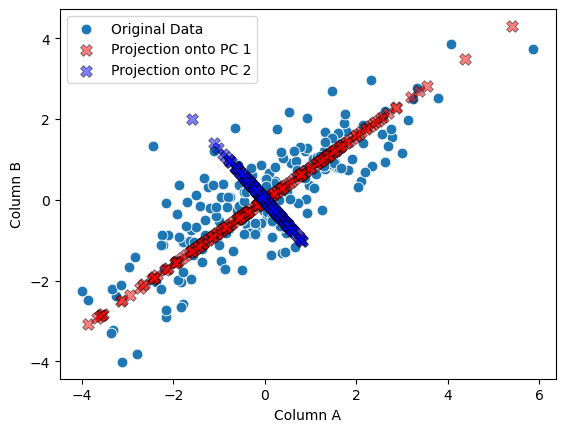

In [94]:
sns.scatterplot(x = Synth_PCA["Column A"], y = Synth_PCA["Column B"], label='Original Data', s= 60)
sns.scatterplot(x = x_pc1, y = y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
sns.scatterplot(x = x_pc2, y = y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')

plt.legend()
plt.show()

In [96]:
#Now let's work with the famous Iris botanical data of plant species recognition
import pandas as pd
File = pd.read_csv("Iris.csv")
Iris = pd.DataFrame(File)
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
#for our purpose we shall only work with the regressing variables
IRIS_ind = Iris.drop(columns = ["Id", "Species"], axis=1)
IRIS_ind.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [100]:
#Preprocessing the data through standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
IRIS_ind_scaled = scaler.fit_transform(IRIS_ind)
IRIS_ind_scaled[0:9]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673]])

In [102]:
#Now transforming our features into 2D features
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_iris_ind = pca.fit_transform(IRIS_ind_scaled)
pca_iris_ind[0:9]
# The two columns observe the two different components being created from the four different features that aim to explain the variance in the dataset

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636]])

In [104]:
#Now building the components that trace the variance in the original dataset
components = pca.components_
components 
# The first row of the components represents weights that were provided to the respective four features of the original dataset in building the first component (PC1)
# The second row of the components represents weights that were provided to the respective four features of the original dataset in building the second component (PC2)

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [106]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
print(f"{round(((pca.explained_variance_ratio_).sum())*100, 3)} percent of the variance in the original dataset is explained by the transformed dataset")

[0.72770452 0.23030523]
95.801 percent of the variance in the original dataset is explained by the transformed dataset


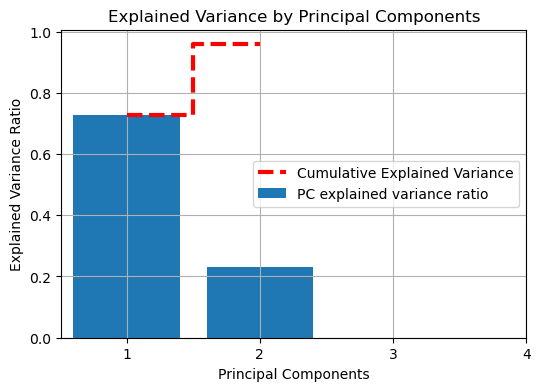

In [108]:
#Now trying to barplot the independent variance_ratio and cumulative variance ratio of the two components
import matplotlib.pyplot as plt
# Plot explained variance ratio for each component
plt.figure(figsize=(6,4))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 3), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

### t-Distributed Stochastic Neighborhood Embedding (t-SNE)
t-SNE is a non-linear dimensionality reduction iterative technique primarily used for visualization of high-dimensional datasets in 2 or 3 dimensions. The "embedding technique" in t-SNE is a sophisticated process that aims to transform high-dimensional data into a low-dimensional space (typically 2D or 3D) while preserving the local structure of the data as much as possible. Neighborhood format is assumed for clustering purpose. However, t-SNE possess scaling limitation that is not in the context of UMAP, its succesor. 

It is important to note that it is not possible to calculate the weightage assigned to the original features in building each t-SNE component as in PCA due to its non-linear dimensionality reduction technique. Nor is the objective of the non-linear dimensionality reduction technique is to capture all variance in the original datasets through its components

#### WARNING
The code cell below relates to the make_blob function is optional to learn. The blob function helps to assign cluster labels to each data point, so that other algorithms can be tested against it. Take it as a target value against which the cluster prediction is tested. Notably, the job of the dimension-reducing algorithms is to make sure that the original clustering dynamics generated based on distance and density should be preserved even when the dimensions of the dataset are signficantly reduced.  

In [112]:
from sklearn.datasets import make_blobs
# CLuster centers:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Cluster standard deviations:
cluster_std=[1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)
#note that four clusters have been created. And therefore, all transformed data will generate four clusters

This is how the three dimension cluster was built through visualization algorithm 
<left>
    <img src="C:/Users/prien/OneDrive%20-%20Global%20Institute%20for%20Interdisciplinary%20Studies%20(GIIS)/Desktop/Capture.JPG" width="500" alt="3D blob">
</left>

In [116]:
# We shall use the synthesized data that was prepared with the make_blob function. Our goal is to convert the three-dimensional data into two-dimensional 
File = pd.read_csv("Synthetic_data.csv")
Synth_data = pd.DataFrame(File)
Synth_data.drop(columns = "Unnamed: 0", axis=1, inplace=True)

In [118]:
Synth_data.head()

,X,Y,Z
0,3.780924,4.361124,8.017637
1,-7.583234,2.916530,1.505645
2,2.958528,11.814974,8.474805
3,-6.581992,6.820529,4.880234
4,-1.573662,8.453141,3.967247


In [120]:
#Let's standardize the data to begin with, since we are still relying on distance metrics in our alogrithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Synth_data_scaled = scaler.fit_transform(Synth_data) 
Synth_data_scaled[0:10]

array([[ 0.82962036,  0.01649615,  0.97252647],
       [-1.39042643, -0.20878892, -0.14816274],
       [ 0.66896101,  1.1789276 ,  1.05120339],
       [-1.19482867,  0.40004149,  0.43259131],
       [-0.21642556,  0.65464817,  0.27546958],
       [-0.20799386,  0.65013196,  0.23377093],
       [ 0.7313061 , -1.6915819 , -1.34570252],
       [-0.10333335,  0.74725773,  0.20365172],
       [ 2.35272317,  0.07678072,  1.70045962],
       [ 0.55510223, -1.69299595, -1.4900553 ]])

In [122]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 30, max_iter = 1000, random_state = 0) #perplexity  relates to the effective number of neighbors that TSNE considers for each data 
                                                                                  #point
Synth_data_scaled_transformed = tsne.fit_transform(Synth_data_scaled) #note that it is not just model fitting but transforming as well. It means there is output that needs to 
                                                                      #be saved into a variable
Synth_data_scaled_transformed[0:9] #so here are the variables that were transformed into two features from three features 
#Now these transformed data can be processed through clustering algorithms such as KMeans, DBSCAN, and HDBSCAN to create clusters and labels (i.e., assignment of data points
#into different clusters). For our purpose, we shall rely on the labels that have already been created by the make_blobs function

array([[  5.717     ,  18.80913   ],
       [ -0.16328727, -20.961475  ],
       [ 10.64897   ,  19.057163  ],
       [  5.723246  , -24.884085  ],
       [ 10.321093  ,  -3.104235  ],
       [ 10.197326  ,  -3.6974084 ],
       [-30.918484  ,   3.5732863 ],
       [ 12.348986  ,  -0.15123472],
       [  3.2781324 ,  26.248894  ]], dtype=float32)

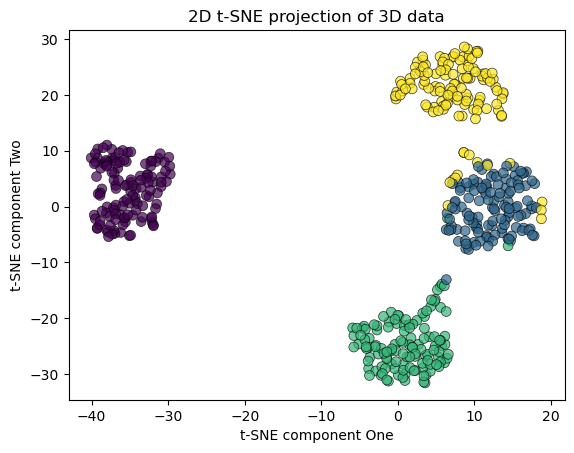

In [123]:
#Now plotting the transformed data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = Synth_data_scaled_transformed[:, 0], y = Synth_data_scaled_transformed[:, 1], c=labels_, cmap = "viridis", s=50, alpha = 0.7, edgecolor = 'k')
plt.title("2D t-SNE projection of 3D data")
plt.xlabel("t-SNE component One")
plt.ylabel("t-SNE component Two")
plt.show()
#Except for slight misclustering of a few yellow labeled data (obtained from the original label assigned through the make_blob function), the algorithm seem to have performed
#well in terms of clustering. Remember that there shall be no target_label to compare against in the real world.  

### Uniform Manifold Approximation and Projection (U-MAP)
U-Map is a newer dimensionality reduction technique that often offers several advantages over t-SNE in terms of speed, scalability, and accuracy. Otherwise, the objectives are quite similar to t-SNE if we do not dive into the core mathematical concepts

In [125]:
import umap.umap_ as UMAP

umap = UMAP.UMAP(n_components=2, min_dist = 0.2, spread = 1) #the min_dist directs the minimum distance to be placed within the data points, whereas spread directs the space
                                                            #between the clusters
Synth_data_scaled_transformed_UMAP = umap.fit_transform(Synth_data_scaled)
Synth_data_scaled_transformed_UMAP[0:10]

D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 4.8294773 ,  4.699745  ],
       [13.9796915 ,  3.9501824 ],
       [ 3.6607263 ,  3.9211533 ],
       [13.84696   ,  5.8335543 ],
       [ 8.071349  ,  0.51696116],
       [ 8.216341  ,  0.71508324],
       [-5.04801   , 11.053931  ],
       [ 7.526182  ,  1.6081514 ],
       [ 3.8652616 ,  6.3497643 ],
       [-5.1075983 , 11.8173    ]], dtype=float32)

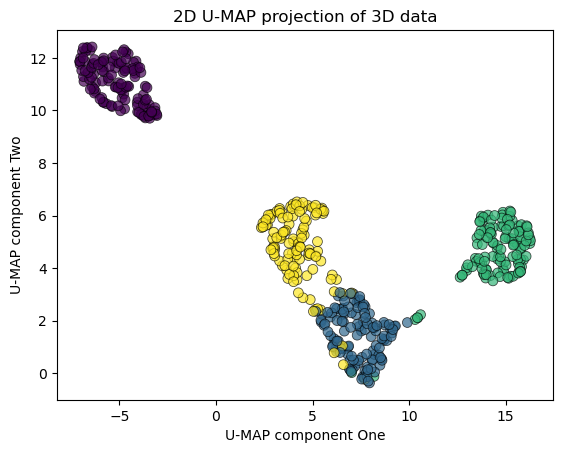

In [128]:
#plotting the transformed variables 
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = Synth_data_scaled_transformed_UMAP[:, 0], y = Synth_data_scaled_transformed_UMAP[:, 1], c=labels_, cmap = "viridis", s=50, alpha = 0.7, edgecolor = 'k')
plt.title("2D U-MAP projection of 3D data")
plt.xlabel("U-MAP component One")
plt.ylabel("U-MAP component Two")
plt.show()
#it was told in the MOOC that U_MAP has performed better in terms of connectivity between the three clusters of the synthesized data. Hence, U-MAP outperformed t-SNE

In [129]:
# Transforming the same dataset through PCA for comparative purposes
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Synth_data_scaled_transformed_PCA = pca.fit_transform(Synth_data_scaled)
Synth_data_scaled_transformed_PCA[0:10]

array([[ 0.52406997,  1.11422484],
       [-0.01211251, -1.31899832],
       [ 1.44138164,  0.86245172],
       [ 0.78337566, -0.99911844],
       [ 0.69362753, -0.17623789],
       [ 0.66088725, -0.18276849],
       [-2.24809889,  0.38910191],
       [ 0.69265194, -0.10735175],
       [ 0.79651874,  2.77960087],
       [-2.31606467,  0.17438195]])

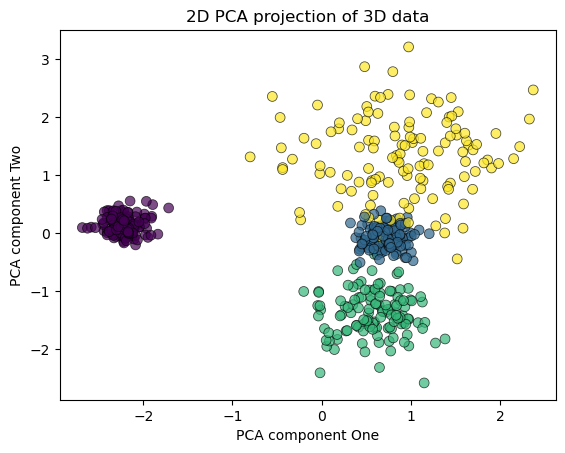

In [130]:
#plotting the transformed variables 
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = Synth_data_scaled_transformed_PCA[:, 0], y = Synth_data_scaled_transformed_PCA[:, 1], c=labels_, cmap = "viridis", s=50, alpha = 0.7, edgecolor = 'k')
plt.title("2D PCA projection of 3D data")
plt.xlabel("PCA component One")
plt.ylabel("PCA component Two")
plt.show()
# Given that the PCA has preserved the connectivity between the three clusters and in fact, ensured that the yellow labels are not mixed up blue, it must have done the best 
#job out of all dimension reducers. It must be because, the data were inherently linear. 